### Random walks

One of the most common **random process** one can think about is the **random walk**. There are so many different types dependning on the lattice and the possible steps. The most elementary is the one in which the random walker starts at 0 and at each step moves only +1 or -1, with equal probability. 

Here, we're going to look at the **2-D random walk**, in a **square lattice**. Thus, the possible steps are North (**N**), South (**S**), East (**E**) and West (**W**), with equal probability. 

In [1]:
from random import random
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import math

In [38]:
@jit
def random_walk(steps):
    
    #Possible directions
    directions = ['North', 'East', 'South', 'West'] 
    
    #Array of the positions
    x_pos = np.zeros(steps)
    y_pos = np.zeros(steps)
    
    for i in range(1, steps):
    
        #Choosing a direction randomly
        r = random()

        if r <= 0.25:
            x_pos[i]= x_pos[i-1]
            y_pos[i] = y_pos[i-1] + 1

        elif r<= 0.5:
            x_pos[i]= x_pos[i-1] + 1
            y_pos[i] = y_pos[i-1]

        elif r<=0.75:
            x_pos[i]= x_pos[i-1]
            y_pos[i] = y_pos[i-1] - 1

        else:
            x_pos[i]= x_pos[i-1] - 1
            y_pos[i] = y_pos[i-1]
        
    return x_pos, y_pos

In [39]:
steps = 1000

x, y = random_walk(steps)

#Finding the max values (for plotting)
if np.abs(x).max() > np.abs(y).max():
    lim = 1.1*np.abs(x).max()

else:
    lim = 1.1*np.abs(y).max()


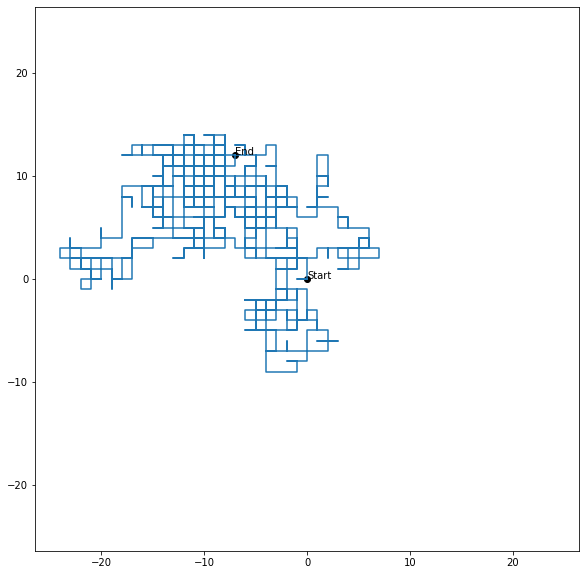

In [40]:
#Plottig the random walk

plt.figure(figsize=(10,10))
plt.axis('square')

plt.plot(0,0, 'ko')
plt.text(0,0, 'Start')

plt.plot(x[steps-1],y[steps-1], 'ko')
plt.text(x[steps-1],y[steps-1], 'End')


plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

plt.plot(x, y)

Now, we're going to see how change the average of the displacement with the number of steps. So, we'll take the average displacement of 500 simulations, and we'll repeat this for several number of steps.

In [51]:
@jit
def average_displacement(simulations, iterations):
    
    displacement = np.zeros(iterations)
    avg_displ = np.zeros(simulations)
    steps = np.zeros(iterations)
    
    steps[0] = 5
    
    
    for k in range(iterations):
        
        for j in range(simulations):
            
            x, y = random_walk(int(steps[k]))
            
            avg_displ[j] = math.sqrt(x[int(steps[k])-1]**2 + y[int(steps[k])-1]**2)
            
        displacement[k] = avg_displ.mean()
        steps[k+1] = 2*steps[k]
        
    
    return steps, displacement
    

In [55]:
#Number of simulations
N = 500

#Number of iterations
iterations = 20

steps, displacement = average_displacement(N, iterations)

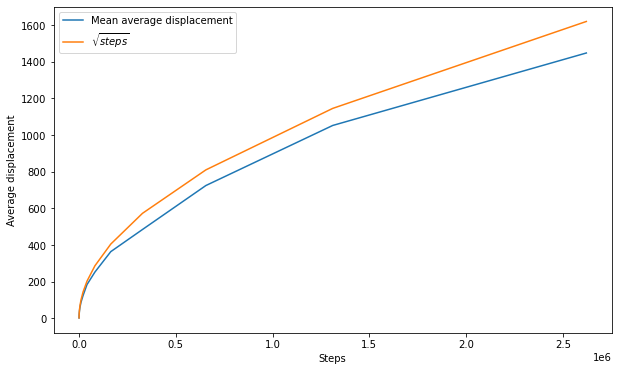

In [73]:
plt.figure(figsize=(10,6))

plt.xlabel('Steps')
plt.ylabel('Average displacement')

plt.plot(steps, displacement, label = 'Mean average displacement')
plt.plot(steps, np.sqrt(steps), label = r'$\sqrt{steps}$')

plt.legend()

We conclude that the growth of the mean average of the displacement is proportional to the square root of the number of steps. 

### Random walks and diffusion

**Diffusion** is the motion of particles from a region of **high concentration to** a region of **low concentration**. We say that the motion is poiting from the higher gradient regions to the lower ones. The motion "ends" when the systems reachs a state where there is no concentration gradient. 

We can study diffusion using the random walks seen previously. Let's imagine we have initially a certain number of particles confined in a small region of a square lattice. We'll suppose each particle moves like a random walker and that they are constrained to a L x L square lattice. So, a particle is bound to stay inside the region.

In [2]:
from random import randint

In [10]:
@jit
def diffusion(N, L, steps):
    
    '''
    N : to compute the total number of particles, N*N
    L : the size of the square lattice
    '''
    
    x = np.zeros(0)
    y = np.zeros(0)

    # Initial configuration of particles (a NxN square)
    for i in range(N):
        for j in range(N):

            x = np.append(x, -int(N/2) + j)
            y = np.append(y, -int(N/2) + i)
            
    #Random walk
    for i in range(0, int(steps)):
    
        directions = ['North', 'East', 'South', 'West'] #Possible directions

        r = randint(0,int(N*N) - 1)  #Choosing a random particle
        
        #We have to consider the case in which one
        # particle is in one of the borders or corner
        # so that it cannot exit the square lattice
        if x[r] == L:
            directions.remove('East')

        elif x[r] == -L:
            directions.remove('West')

        if y[r] == L:
            directions.remove('North')

        elif y[r] == -L:
            directions.remove('South')

        dir_i = randint(0, len(directions) - 1)

        #Choosing a direction randomly
        direction = directions[dir_i]

        if direction == 'North':
            y[r] += 1

        elif direction == 'East':
            x[r] += 1

        elif direction == 'South':
            y[r] -= 1  

        else: 
            x[r] -= 1
        
    
    return x, y

In [11]:
#Initial conditions
N = 21 # N*N particles
L = 100
steps = [5000, 50000, 500000, 5000000]

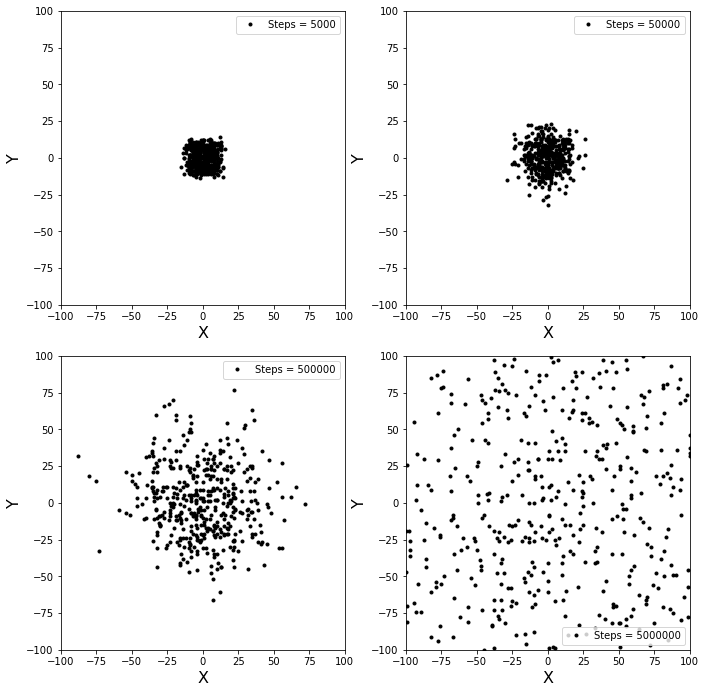

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10, 10))
axes = axes.flatten()
fig.tight_layout(pad=3.0)
i = 0

for ax in axes:
    
    x, y = diffusion(N, L, steps[i])
    
    ax.plot(x, y, label ='Steps = ' + str(steps[i]), linestyle = 'None', marker = 'o', markersize = 3, color='black')
    ax.set_xlabel('X', fontsize = 16)
    ax.set_ylabel('Y', fontsize=16)
    ax.legend()
    ax.set_xlim(-L, L)
    ax.set_ylim(-L, L)
    
    i += 1

plt.show()

As we would expect, for large times (steps) the distribution of particles along the lattice is completely homogeneous, that's to say there is no concentration gradient. Each particles moves individually, but the overall remains constant. 

In [233]:
x, y = diffusion(5, 20, 1000)

In [234]:
r_pos = [pos for pos in zip(x,y)]

In [235]:
r_pos = np.array(r_pos)


In [166]:
@jit
def GenerateDensityDistribution(density, x, y, L):
    #Counts number of particles in each grid cell
    #Set all elements in density to 0
    density.fill(0)
    #Length of grid square
    g = L/8
    #Position of particle in grid
    xi = 0
    yi = 0
    #Index to store particle count in density array
    for k in range(len(x)):
        xi = np.floor(x[k]/g)
        yi = np.floor(y[k]/g)
        i = int (8 * yi + xi)
        density[i] += 1
    
    return density

In [168]:
@jit
def CalculateEntropy(density, x, y, L):
    #Calcultes the entropy for a given snapshot of the simulation
    #Creates array of the densities of each region
    densities = GenerateDensityDistribution(density, x, y, L)
    #Running tally for entropy
    N = 21*21
    S = 0
    for density in densities:
        pi = i/N
        if pi != 0:
            S -= pi * np.log(pi)
        else:
            #If pi is 0, log function undefined. A small, non zero value is used instead
            S -= 0#pi * np.log(1e15)
    return S

In [169]:
steps = 500000
h = 1000
e = np.zeros(int(steps/h))
L = 100
N = 21

In [170]:
@jit
def diffusion_1(N, L, steps, e, h):
    
    '''
    N : to compute the total number of particles, N*N
    L : the size of the square lattice
    '''
    
    x = np.zeros(N*N)
    y = np.zeros(N*N) 
    
    density = np.zeros([64])
    #Random walk
    
    j = 0
    for i in range(0, int(steps)):
        
        if i%h == 0:
            
            e[j] = CalculateEntropy(density, x, y, L)
            
            j += 1
            
            
        directions = ['North', 'East', 'South', 'West'] #Possible directions

        r = randint(0,int(N*N) - 1)  #Choosing a random particle
        
        #We have to consider the case in which one
        # particle is in one of the borders or corner
        # so that it cannot exit the square lattice
        if x[r] == L:
            directions.remove('East')

        elif x[r] == -L:
            directions.remove('West')

        if y[r] == L:
            directions.remove('North')

        elif y[r] == -L:
            directions.remove('South')

        dir_i = randint(0, len(directions) - 1)

        #Choosing a direction randomly
        direction = directions[dir_i]

        if direction == 'North':
            y[r] += 1

        elif direction == 'East':
            x[r] += 1

        elif direction == 'South':
            y[r] -= 1  

        else: 
            x[r] -= 1
        
    
    return x, y, e

In [171]:
x, y, entr = diffusion_1(N, L, steps, e, h)


<ipython-input-170-7daca1a37615>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "diffusion_1" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=[64]>)
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
      Overload of function 'zeros': File: numba\core\typing\npydecl.py: Line 511.
        With argument(s): '(list(int64)<iv=None>)':
       No match.

During: resolving callee type: Function(<built-in function zeros>)
During: typing of call at <ipython-input-170-7daca1a37615> (12)


File "<ipython-input-170-7daca1a37615>", line 12:
def diffusion_1(N, L, steps, e, h):
    <source elided>
    
    density = np.zeros([64])
    ^

  @jit
<ipython-input-170-7daca1a37615>:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "diffusion_1" failed type inference du

In [172]:
steps_i = np.arange(0, steps, h)

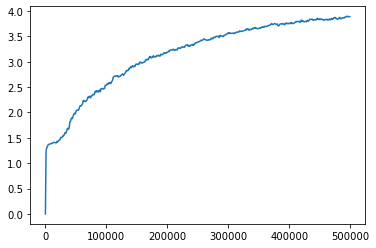

In [173]:
plt.plot(steps_i, e)

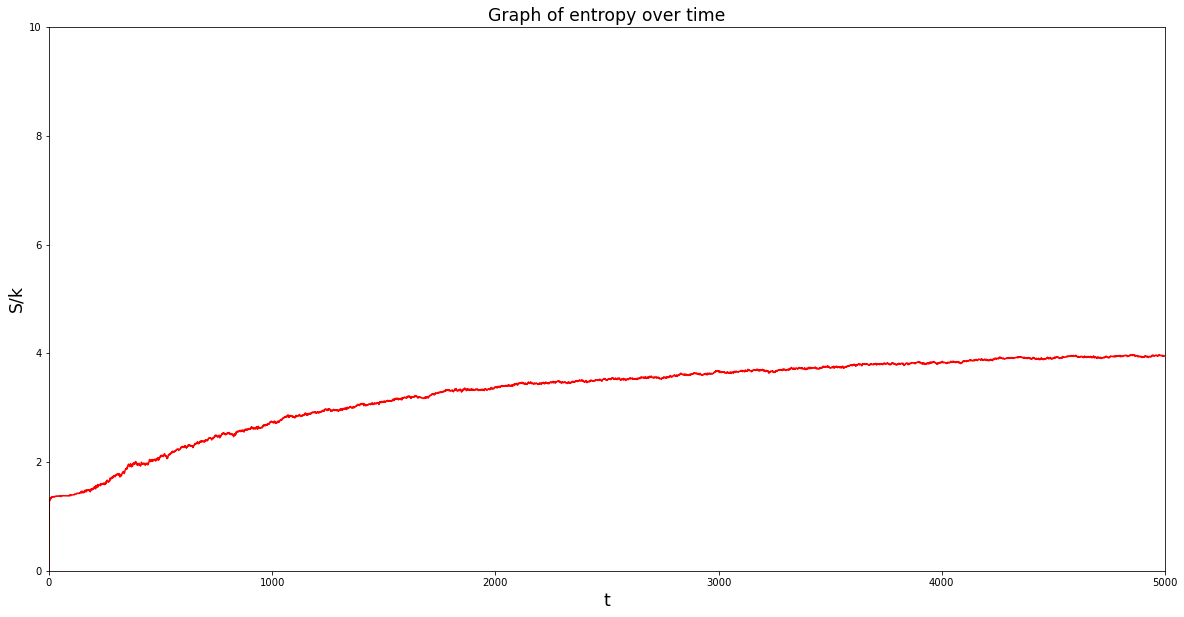

In [146]:
#Boiler plate code to make sure everything works
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt


#Number of particles to be simulated
N = 400
#Number of time steps to be simulated
T = 5000
#Length of sides of lattice on which particles dwell
l = 200
#How often should program save a snapshot of the particle difusion
SaveRate = 50

#Creates an array of N particles, each with an x and y commponent
particles = np.zeros([N,2])
#Creates an array of length T to store the entropy at each moment in time
entropy = np.zeros([T])
#Create and array to store the particle density in each region of 8 * 8 grid
density = np.zeros([64])

def InitialiseParticles():
    #Set the initial position for all the particles
    for p in particles:
        p[0] = 100
        p[1] = 100

def GenerateSnapshot(n):
    #Creates an image of where the particles currently are in the l * l lattice
    if n%SaveRate == 0:
        #Clear current graph
        plt.cla()
        
        plt.xlim(0, l)
        plt.ylim(0, l)

        plt.plot(particles[:,0], particles[:,1],  marker=".", ms=5, lw=0, c="g")
        plt.savefig("Difusionplot"+str(n)+ ".png")

def SimulateStep():
    #Moves simulation forward by a step of 1
    for p in particles:
        #Pick a random direction to move in
        
        #First, decide to move in either the x or y direction
        #Then decide to move "up or down" or "left or right"
        if np.random.randint(0, 2, 1):
            #Move in x direction
            if np.random.randint(0, 2, 1):
                #Move right
                p[0] += 1
            else:
                #Move left
                p[0] -= 1
        else:
            #Move in y direction
            if np.random.randint(0, 2, 1):
                #Move up
                p[1] += 1
            else:
                #Move down
                p[1] -= 1
        #Need to check for collisions
        if p[0] < 0:
            #Too far to left
            p[0] += 2 # Reflected back
        if p[0] > l-1:
            #Too far to right
            p[0] -= 2 # Reflected back
        if p[1]<0:
            #Too far down
            p[1] += 2 # Reflected back
        if p[1] > l-1:
            #Too far up
            p[1] -= 2 # Reflected back
def GenerateDensityDistribution():
    #Counts number of particles in each grid cell
    #Set all elements in density to 0
    density.fill(0)
    #Length of grid square
    g = l/8
    #Position of particle in grid
    x = 0
    y = 0
    #Index to store particle count in density array
    for p in particles:
        x = np.floor(p[0]/g)
        y = np.floor(p[1]/g)
        i = int (8 * y + x)
        density[i] += 1
    
def CalculateEntropy(t):
    #Calcultes the entropy for a given snapshot of the simulation
    #Creates array of the densities of each region
    GenerateDensityDistribution()
    #Running tally for entropy
    S = 0
    for i in density:
        pi = i/N
        if pi != 0:
            S -= pi * np.log(pi)
        else:
            #If pi is 0, log function undefined. A small, non zero value is used instead
            S -= 0#pi * np.log(1e15)
    entropy[t] = S

def EntropyPlot():
    plt.cla()
    
    plt.title("Graph of entropy over time", fontsize ="xx-large")
    plt.xlabel('t', fontsize ="xx-large")
    plt.ylabel('S/k', fontsize ="xx-large")
    plt.xlim(0, T)
    plt.ylim(0, 10)

    plt.plot(range(T), entropy[:],"-r")
    plt.savefig("Entropyplot.png")


#Set size of figure
plt.figure(figsize=(20,10))
#Set initial positions for particles
InitialiseParticles()
#Loop through the particles
for i in range(T):
    #Create an image of particles if appropriate
    GenerateSnapshot(i)
    #Calculate the entropy at each point in time
    CalculateEntropy(i)
    #Move on to the next step of the simulation
    SimulateStep()
#Create a plot of the entropy with respect to number of steps t
EntropyPlot()